● Import NumPy, Pandas, Seaborn, and Matplotlib libraries for data analysis

● Import sklearn.model_selection, sklearn.metrics, sklearn.ensemble,
sklearn.linear_model, sklearn_tree, sklearn.neighbour libraries and modules for
modellling and evaluating performance of the model

In [386]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from math import sqrt
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [387]:
melbourne = pd.read_csv("Melbourne_housing_FULL.csv")
df = melbourne.copy()
cat_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Car', 'CouncilArea', 'Regionname', "Postcode"]
num_cols = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Landsize', "BuildingArea", "Lattitude", "Longtitude", "Propertycount"]
all_cols = cat_cols + num_cols
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [388]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [390]:
df.head()
df.shape

(34857, 21)

Getting rid of duplicated values

In [391]:
df.duplicated().sum()
df.loc[df.duplicated(keep=False), :]
dfdrop = df.drop([15857])
dfdrop.duplicated().sum()

0

Getting rid of NaN values

In [392]:
print(pd.concat([dfdrop.isnull().sum(), dfdrop.isnull().sum()/len(dfdrop)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Address                               0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                              7609                21.829814
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              1                 0.002869
Postcode                              1                 0.002869
Bedroom2                           8217                23.574134
Bathroom                           8226                23.599954
Car                                8728                25.040165
Landsize                          11810                33.882258
BuildingArea             

In [393]:
for columns in all_cols:
  dfdrop.dropna(subset=[columns], inplace=True)

In [394]:
dfdrop.shape

(9235, 21)

Getting rid of outliers

In [395]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    print(col, check_outlier(dfdrop, col))


Rooms True
Price True
Distance True
Bathroom True
Landsize True
BuildingArea True
Lattitude True
Longtitude True
Propertycount True


In [396]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
for col in num_cols:
  print(col, replace_with_thresholds(dfdrop, col))

Rooms None
Price None
Distance None
Bathroom None
Landsize None
BuildingArea None
Lattitude None
Longtitude None
Propertycount None


Data Visualisation


<Axes: ylabel='Frequency'>

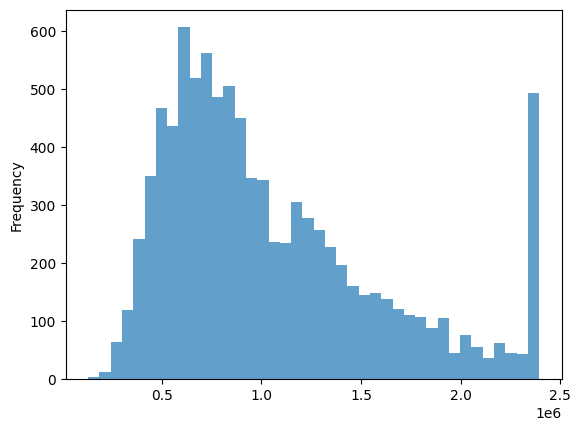

In [397]:
dfdrop["Price"].plot.hist(bins=40, label='Price', alpha=0.7)

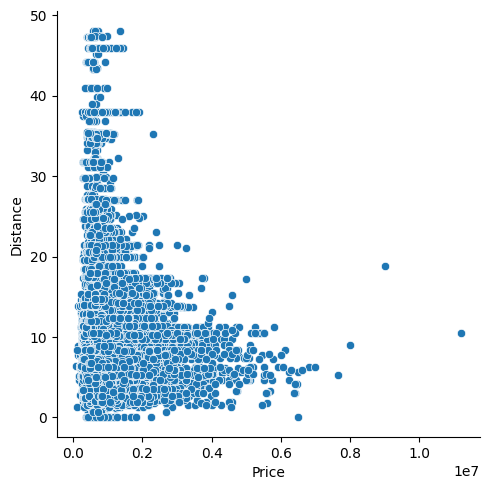

In [398]:
sns.relplot(data=melbourne, x="Price", y="Distance")


In [399]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in dfdrop.columns if 12 >= dfdrop[col].nunique() > 2]
dfdrop = one_hot_encoder(dfdrop, ohe_cols, drop_first=True)

In [400]:
num_cols = [ 'Price', 'Distance', 'Landsize', "BuildingArea", "Lattitude", "Longtitude", "Propertycount"]
scaler = StandardScaler()
dfdrop[num_cols] = scaler.fit_transform(dfdrop[num_cols])

Model Evaluation

In [401]:
Lasso = linear_model.Lasso
LinearRegression = LogisticRegression
Ridge = linear_model.Ridge
ElasticNet = linear_model.ElasticNet


In [402]:
dfdrop = dfdrop.drop(["Suburb"], axis=1)
dfdrop = dfdrop.drop(["Address"], axis=1)
dfdrop = dfdrop.drop(["SellerG"], axis=1)
dfdrop = dfdrop.drop(["Date"], axis=1)
dfdrop = dfdrop.drop(["Postcode"], axis=1)
dfdrop = dfdrop.drop(["CouncilArea"], axis=1)
dfdrop = dfdrop.drop(["Type"], axis=1)

y = dfdrop["Price"]
X = dfdrop.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
dfdrop


KeyError: ignored

In [365]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (7388, 14)
Shape of x_test is (1847, 14)
Shape of y_train is (7388,)
Shape of y_test is (1847,)


In [403]:

models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
}

for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=10)
    mse = mean_squared_error(y, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y, y_pred)

    print(f'########## {name} ##########')
    print(f'MAE: {round(mae, 4)}')
    print(f'RMSE: {round(rmse, 4)}')
    print(f'MSE: {round(mse, 4)}')
    print(f'R2 Score: {round(r2, 4)}')

ValueError: ignored